# 0. Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plot_image, plot_image_misclass
from capsnet import CapsNet
from capsnet_mod import CapsNetMod

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

# 1. Dataset

## 1.1. MNIST

In [4]:
data_name_1 = 'MNIST'
dataset_1 = Dataset(data_name_1)

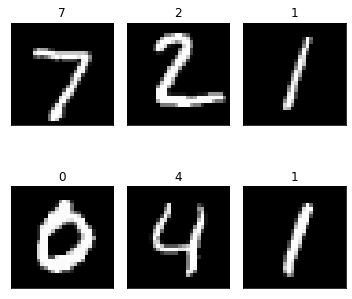

(28, 28, 1) (10,)


In [5]:
n_img = 6
plot_image(dataset_1.x_test[:n_img], dataset_1.y_test[:n_img], dataset_1.class_names, n_img)
print(dataset_1.x_test[0].shape, dataset_1.y_test[0].shape)

## 1.2. SMALLNORB

In [7]:
data_name_2 = 'SMALLNORB'
dataset_2 = Dataset(data_name_2)

MemoryError: Unable to allocate 854. MiB for an array with shape (24300, 48, 48, 2) and data type float64

In [7]:
n_img = 6
plot_image(dataset_2.x_test[:n_img], dataset_2.y_test[:n_img], dataset_2.class_names, n_img)
print(dataset_2.x_test[0].shape, dataset_2.y_test[0].shape)

# 2. Test MNIST

## 2.1. CapsNet

In [10]:
model_mnist = CapsNet(data_name_1, mode='test', r=3)
model_mnist.load_weight(93)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 20, 256)       20992     
_________________________________________________________________
primary_caps (PrimaryCaps)   (None, 6, 6, 32, 8)       5308928   
_________________________________________________________________
digit_caps (DigitCaps)       (None, 10, 16)            1474720   
_________________________________________________________________
length (Length)              (None, 10)                0         
Total params: 6,804,640
Trainable params: 6,804,640
Non-trainable params: 0
_________________________________________________________________
Model: "Decoder"
_________________________________________________________________
Layer (type)                 Out

In [11]:
model_mnist.evaluate(dataset_1.x_test, dataset_1.y_test)
y_pred = model_mnist.predict(dataset_1.x_test)[0]

Test Accuracy: 99.4500%
Test Error: 0.5500%


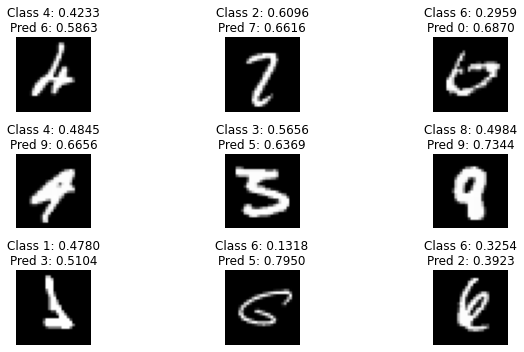

In [12]:
n_img = 9
plot_image_misclass(dataset_1.x_test, dataset_1.y_test, y_pred, dataset_1.class_names, n_img)

## 2.2. CapsNetMod

In [13]:
model_mod_mnist = CapsNetMod(data_name_1, mode='test')
model_mod_mnist.load_weight(100)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 22, 22, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 64)        256 

In [14]:
model_mod_mnist.evaluate(dataset_1.x_test, dataset_1.y_test)
y_pred = model_mod_mnist.predict(dataset_1.x_test)[0]

Test Accuracy: 99.4800%
Test Error: 0.5200%


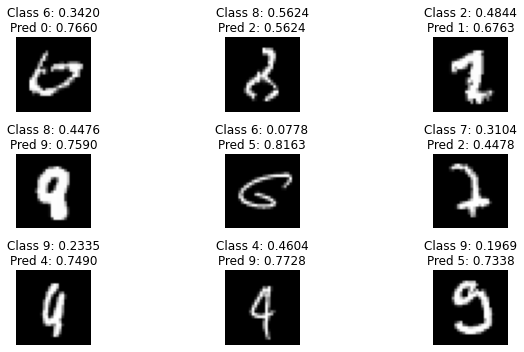

In [15]:
n_img = 9
plot_image_misclass(dataset_1.x_test, dataset_1.y_test, y_pred, dataset_1.class_names, n_img)

# 3. Test SMALLNORB

## 3.1. CapsNet

In [ ]:
model_smallnorb = CapsNetMod(data_name_2, mode='test', r=3)
model_smallnorb.load_weight(86)

In [ ]:
model_smallnorb.evaluate(dataset_2.x_test, dataset_2.y_test)
y_pred = model_smallnorb.predict(dataset_2.x_test)[0]

In [ ]:
n_img = 9
plot_image_misclass(dataset_2.x_test, dataset_2.y_test, y_pred, dataset_2.class_names, n_img)

## 3.2. CapsNetMod

In [ ]:
model_mod_smallnorb = CapsNetMod(data_name_2, mode='test', r=3)
model_mod_smallnorb.load_weight(189)

In [ ]:
model_mod_smallnorb.evaluate(dataset_2.x_test, dataset_2.y_test)
y_pred = model_mod_smallnorb.predict(dataset_2.x_test)[0]

In [ ]:
n_img = 9
plot_image_misclass(dataset_2.x_test, dataset_2.y_test, y_pred, dataset_2.class_names, n_img)